<a href="https://colab.research.google.com/github/nvaughn/Pytorch/blob/main/SimpleModel_Predict_Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Fundamentals Workflow


The point of machine learning which includes Deep Learning use some data from the past, Create an algorithm to discover patterns (Model) in it and use the Model to predict the future. This can be numeric data for logistic regresion or other unstructured data ie audio, images, etc.. which we may use to generate something new based on the created model.

In this notebook we are going to start with something that is easy to visualize. We will create a model to predict a straight line.  This will be useful as we'll be able to quickly create a model that we can interept.

The steps are as follows:

| 1       | 2    |    3  | 4      | 5   |
|--------|--------|--------|--------|--------|
|Get Data | Build Model| Train Model | infere/Predict | Save Model|




# 0. Setup our environment for Pytorch

In [24]:
import torch  # Pytorch
from torch import nn  # Neural Network Modules
import matplotlib.pyplot as plt # visulization tools

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Get Data

#### Data can be anything. Our data will be a straight line

In [25]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"X: {X[:10]}")
print(f"y: {y[:10]}")


X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


# 1.1 Split data into training and test sets¶

#### It is super important to always split your data into a training and test set (Note: Sometimes you'll also see a validation set).

| Split | Purpose | Split Amount |
|-------|-------|-------|
|Training set | The model learns from this data |~60-80%|
|Validation set | The model gets tuned on this data | ~10-20%|
|Testing set| The model gets evaluated on this data to test what it has learned| ~10-20%|


In [26]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Length of X_training data: {len(X_train)}")
print(f"Length of y_training data: {len(y_train)}")
print(f"Length of X_test data: {len(X_test)}")
print(f"Length of y_test data: {len(y_test)}")



Length of X_training data: 40
Length of y_training data: 40
Length of X_test data: 10
Length of y_test data: 10


# 1.3 Visualize the Data

#### Working with Neural Networks can be very abstract.  It is good to visualize the data often as you can quickly see if something is wrong.

In [27]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Create a Scatter Plot to show the training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Create a Scatter Plot to show the test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Create a Scatter Plot to show the predictions in red (Remember this is predictions on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

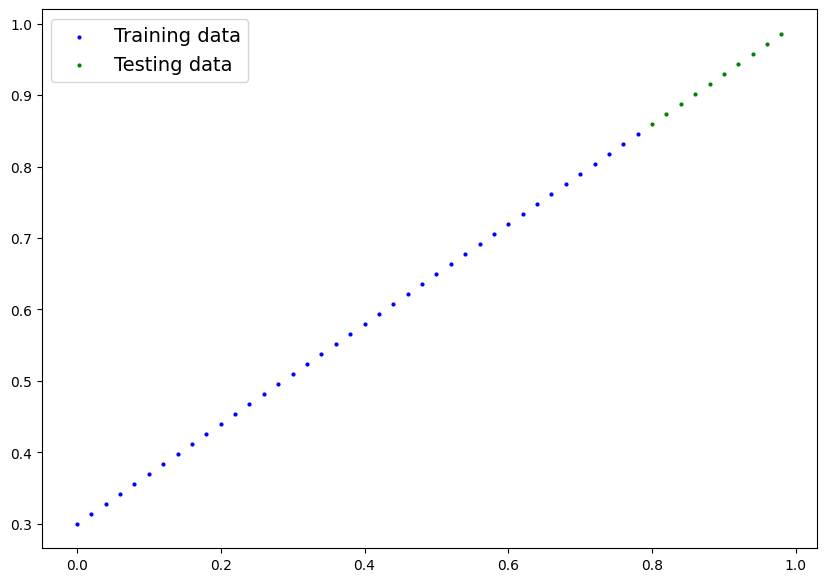

In [28]:
plot_predictions();


## 2. Build The Model

#### Now that we have some data we next create a model to learn patterns in it.We will also choose a loss function and optimizer. We will need to train over multiple iterations (epochs) so we will need to build a loop for training.

# 2.1

#### Let's build a linear regression model to use the blue dots (training data) to predict the green dots (test data).

#### **torch.nn**	Contains all of the building blocks for building Neural Networks. We create a class that inheirts it's interface.

#### **weights** and **biases** are parameters to the model which will be adjusted each epoch.

#### **forward()** tells the Neural Network how to make calculations on the inputs

### NOTE: The linear regression formula is **(y = m*x + b)**

In [29]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# 2.2 Instantiate the model

In [30]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [31]:
# Let's Peek at the model state by viewing it's parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# 2.3 Initial Preditions

#### Let's make some initial prediction ( **torch.inference_mode** ) with our RANDOM data.  As you may guess.. since it's random data, most likely it will not look great.

In [32]:
with torch.inference_mode():
    y_preds = model_0(X_test)


In [33]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


# 2.4

#### Let's Visualize the prediction

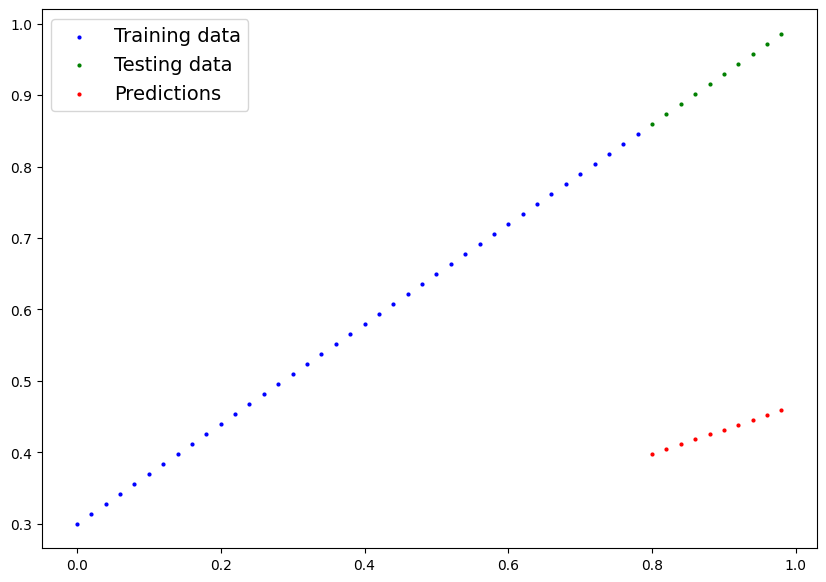

In [34]:
plot_predictions(predictions=y_preds)

## 3. Train the Model

#### Now we let the model iterate over the data for a predefined numbber of epochs.

In [35]:
y_test - y_preds


tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [36]:
# loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# optimizer function
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# 4.1 Create a training loop



In [37]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

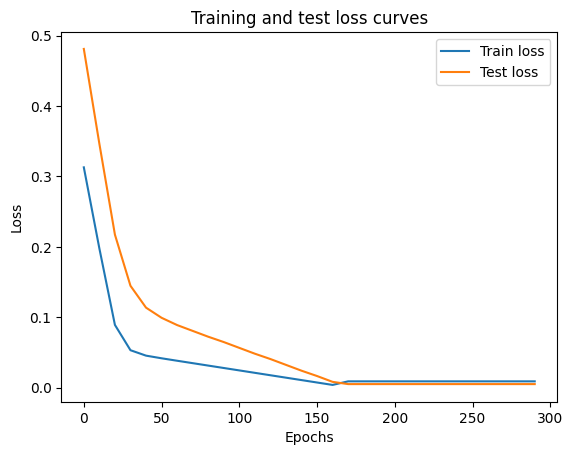

In [38]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [39]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


# 4. Infer (Making Predictions)

#### Now that the model is trained we can start to make predictions and evaluating the model (inference) by comparing its findings to the actual (testing) data.

#### For our model to update its parameters on its own we need to create both a loss and optimizer function.


|Function |	What does it do? |	Where does it live in PyTorch?	|Common values|
|---------|---------|---------|---------|
|Loss|Measures how wrong your models predictions| torch.nn |Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()). Binary cross entropy for binary classification problems (torch.nn.BCELoss()), |
|Optimizer|Tells your model how to update its internal parameters to best lower the loss.|torch.optim|Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam())|

#### Because we are predicting a number we will use MAE (Mean absolute error) as our loss function

#### Mean absolute error (MAE, in PyTorch: torch.nn.L1Loss) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples

#### We can use  SGD, torch.optim.SGD(params, lr) for our optimizer

In [40]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

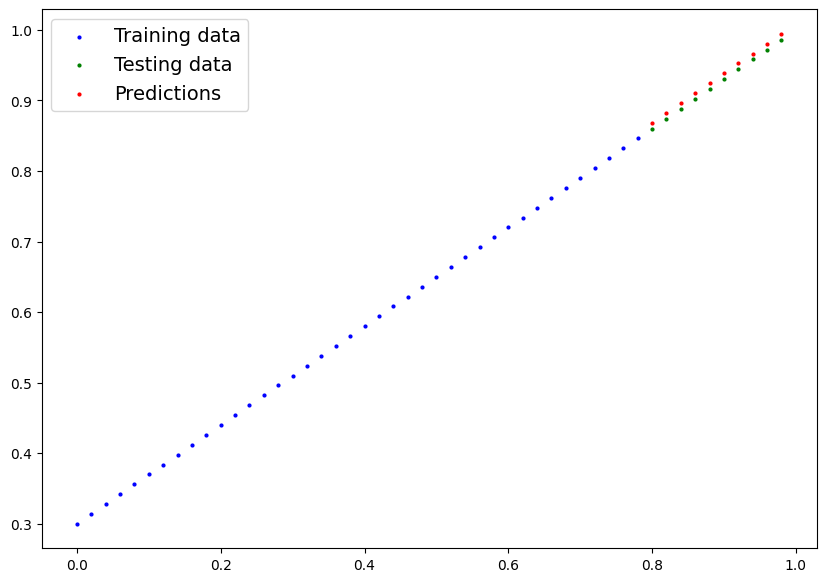

In [41]:
plot_predictions(predictions=y_preds)


# 5. Saving Model

#### Since we will hopefully resuse the model we will save it via serialization (Pickle).

|PyTorch method	| What does it do?|
|----------|----------|
|torch.save|Saves a serialized object to disk using Python's pickle utility.|
|torch.load|Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory|
|torch.nn.Module.load_state_dict|Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.|

#### we only want to save the model's state_dict() which is a dictionary of learned parameters and not the entire model, we first have to load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model (which is a subclass of nn.Module).



In [42]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [43]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1207 Jul  6 02:46 models/01_pytorch_workflow_model_0.pth


# 5.1 Reload the model state and run the model to verify it's operational

In [44]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [45]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [46]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])